# Factors Analyzed for their Contributions to Heart Disease 
**Capstone 1 Cleveland-specific code**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
import seaborn as sns
from IPython.display import display, HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools



locationrisk = [['Ohio', 7.62], ['Cleveland, OH', 8.76], ['California', 5.30], ['Long Beach, CA', 5.46]]
locationriskdf = pd.DataFrame(locationrisk)
locationriskdf.columns=['Location', 'Heart Disease Rate']
print('\033[1m \n Table 1. Heart disease rates in key locations (from CDC.gov)')
display(HTML(locationriskdf.to_html(index=False)))

 
 Table 1. Heart disease rates in key locations (from CDC.gov)


Location,Heart Disease Rate
Ohio,7.62
"Cleveland, OH",8.76
California,5.30
"Long Beach, CA",5.46


In [2]:
variables = [['age','age'], ['sex','sex'], ['cp','chest pain type'], ['trestpbs','resting blood pressure'], 
             ['chol','cholesterol level'], ['fbs','fasting blood sugar'], 
             ['restecg','resting electrocardiographic results'], ['thalach','maximum heart rate'],
            ['exang','exercise-induced angina'], ['oldpeak','ST depression induced by exercise and relative to rest'],
            ['slope','slope of the peak exercise ST segment'], ['ca','coronary angiography score'], 
            ['thal','thalassemia defect'], ['num','numerical heart disease score']]
variablesdf = pd.DataFrame(variables)
variablesdf.columns=['Variable Name', 'Definition of Variable (from UCI Machine Learning Repository)']
print('\033[1m \n Table 2. Heart disease feature names and their abbreviations')
pd.set_option('display.max_colwidth', 70)
display(HTML(variablesdf.to_html(index=False)))


 
 Table 2. Heart disease feature names and their abbreviations


Variable Name,Definition of Variable (from UCI Machine Learning Repository)
age,age
sex,sex
cp,chest pain type
trestpbs,resting blood pressure
chol,cholesterol level
fbs,fasting blood sugar
restecg,resting electrocardiographic results
thalach,maximum heart rate
exang,exercise-induced angina
oldpeak,ST depression induced by exercise and relative to rest


In [3]:
#Data import, cleaning steps, and consolidation. Code for info, head, and component histograms are available here,
#but coded out so as to simplify output. However, they can be viewed in output by removing sets of triple quotation
#marks.

#___________________________________________cleveland import_______________________________________________________________________________________________________
cleveland_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/processed_cleveland_data.csv', header=None, na_values = '?')
cleveland_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
cleveland_df['sex'] = cleveland_df['sex'].astype(float)
cleveland_df['cp'] = cleveland_df['cp'].astype(float)
cleveland_df['fbs'] = cleveland_df['fbs'].astype(float)
cleveland_df['restecg'] = cleveland_df['restecg'].astype(float)
cleveland_df['exang'] = cleveland_df['exang'].astype(float)
cleveland_df['slope'] = cleveland_df['slope'].astype(float)
cleveland_df['ca'] = cleveland_df['ca'].astype(float) #throws errors over the NaN for int, just changing these to floats for now
cleveland_df['thal'] = cleveland_df['thal'].astype(float)
cleveland_df.insert(0, 'location', 'Cleveland')

print('cleveland')
print(cleveland_df.head()) 
print(cleveland_df.columns) 
print(cleveland_df.info()) 



#___________________________________________hungarian import_______________________________________________________________________________________________________
hungarian_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/reprocessed_hungarian_data.txt', sep=" ", header=None, na_values = '-9.0')
hungarian_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
hungarian_df['sex'] = hungarian_df['sex'].astype(float)
hungarian_df['cp'] = hungarian_df['cp'].astype(float)
hungarian_df['fbs'] = hungarian_df['fbs'].astype(float)
hungarian_df['restecg'] = hungarian_df['restecg'].astype(float)
hungarian_df['exang'] = hungarian_df['exang'].astype(float)
hungarian_df['slope'] = hungarian_df['slope'].astype(float)
hungarian_df['ca'] = hungarian_df['ca'].astype(float)
hungarian_df['thal'] = hungarian_df['thal'].astype(float)
hungarian_df = hungarian_df[np.isfinite(hungarian_df['num'])]
hungarian_df['num'] = hungarian_df['num'].astype(int)
hungarian_df.insert(0, 'location', 'Hungary')
'''
print('hungarian')
print(hungarian_df.head()) 
print(hungarian_df.columns) 
print(hungarian_df.info()) 
'''

#___________________________________________long beach import_______________________________________________________________________________________________________
long_beach_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/processed_va_data.csv', header=None, na_values = '?')
long_beach_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
long_beach_df['age'] = long_beach_df['age'].astype(float)
long_beach_df['fbs'] = long_beach_df['fbs'].astype(float)
long_beach_df['exang'] = long_beach_df['exang'].astype(float)
long_beach_df['slope'] = long_beach_df['slope'].astype(float)
long_beach_df['ca'] = long_beach_df['ca'].astype(float)
long_beach_df['thal'] = long_beach_df['thal'].astype(float)
long_beach_df.insert(0, 'location', 'Long_Beach')
'''
print('long beach')
print(long_beach_df.head()) 
print(long_beach_df.columns) 
print(long_beach_df.info()) 
'''

#get rid of any entry with NaN in num.
cleveland_df = cleveland_df[np.isfinite(cleveland_df['num'])]
hungarian_df = hungarian_df[np.isfinite(hungarian_df['num'])]
long_beach_df = long_beach_df[np.isfinite(long_beach_df['num'])]


#___________________________________________ca distribution and fix na in hungarian, switch out NaN's_______________________________________________________________________________________________________
'''
cleveland_df['ca'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['ca'].plot(kind='hist', color='red')
plt.show()
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()

print(hungarian_df['ca'][30:50])
hungarian_df['ca'][39] = np.nan
print(hungarian_df['ca'][30:50])
cleveland_df['ca'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['ca'].plot(kind='hist', color='red')
plt.show()
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()
print('ca')
cleveland_df['ca'].plot(kind='hist', color='blue')
hungarian_df['ca'].plot(kind='hist', color='red')
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()
'''

# ca was discrete and non-normal. use mode.
ca_mode_cleveland = cleveland_df.ca.mode()
cleveland_df['ca'] = cleveland_df.ca.fillna(ca_mode_cleveland[0])
#print(cleveland_df.info())
ca_mode_hungarian = hungarian_df.ca.mode()
hungarian_df['ca'] = hungarian_df.ca.fillna(ca_mode_hungarian[0])
#print(hungarian_df.info())
ca_mode_long_beach = long_beach_df.ca.mode()
long_beach_df['ca'] = long_beach_df.ca.fillna(ca_mode_long_beach[0])
'''
print(long_beach_df.info())
print('age')
cleveland_df['age'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['age'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['age'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#dist varies by pop but overall mostly normal, slight skew to right. continuous var. will use median for missing.
age_median_cleveland = cleveland_df.age.median()
cleveland_df['age'] = cleveland_df.age.fillna(age_median_cleveland)
age_median_hungarian = hungarian_df.age.median()
hungarian_df['age'] = hungarian_df.age.fillna(age_median_hungarian)
age_median_long_beach = long_beach_df.age.median()
long_beach_df['age'] = long_beach_df.age.fillna(age_median_long_beach)
'''
print('sex')
cleveland_df['sex'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['sex'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['sex'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal. mostly male. use mode for right now, subject to change.
sex_mode_cleveland = cleveland_df.sex.mode()
cleveland_df['sex'] = cleveland_df.sex.fillna(sex_mode_cleveland[0])
sex_mode_hungarian = hungarian_df.sex.mode()
hungarian_df['sex'] = hungarian_df.sex.fillna(sex_mode_hungarian[0])
sex_mode_long_beach = long_beach_df.sex.mode()
long_beach_df['sex'] = long_beach_df.sex.fillna(sex_mode_long_beach[0])
'''
print('cp')
cleveland_df['cp'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['cp'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['cp'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal, but hungarian looks different from others. either median or mode, not sure yet. just go with median right now.
cp_median_cleveland = cleveland_df.cp.median()
cleveland_df['cp'] = cleveland_df.cp.fillna(cp_median_cleveland)
cp_median_hungarian = hungarian_df.cp.median()
hungarian_df['cp'] = hungarian_df.cp.fillna(cp_median_hungarian)
cp_median_long_beach = long_beach_df.cp.median()
long_beach_df['cp'] = long_beach_df.cp.fillna(cp_median_long_beach)
'''
print('trestbps')
cleveland_df['trestbps'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['trestbps'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['trestbps'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous and close enough to normal. use median.
trestbps_median_cleveland = cleveland_df.trestbps.median()
cleveland_df['trestbps'] = cleveland_df.trestbps.fillna(trestbps_median_cleveland)
trestbps_median_hungarian = hungarian_df.trestbps.median()
hungarian_df['trestbps'] = hungarian_df.trestbps.fillna(trestbps_median_hungarian)
trestbps_median_long_beach = long_beach_df.trestbps.median()
long_beach_df['trestbps'] = long_beach_df.trestbps.fillna(trestbps_median_long_beach)
'''
print('chol')
cleveland_df['chol'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['chol'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['chol'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous and close enough to normal. use median.
chol_median_cleveland = cleveland_df.chol.median()
cleveland_df['chol'] = cleveland_df.chol.fillna(chol_median_cleveland)
chol_median_hungarian = hungarian_df.chol.median()
hungarian_df['chol'] = hungarian_df.chol.fillna(chol_median_hungarian)
chol_median_long_beach = long_beach_df.chol.median()
long_beach_df['chol'] = long_beach_df.chol.fillna(chol_median_long_beach)
'''
print('fbs')
cleveland_df['fbs'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['fbs'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['fbs'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal. vast majority one value. use mode.
fbs_mode_cleveland = cleveland_df.fbs.mode()
cleveland_df['fbs'] = cleveland_df.fbs.fillna(fbs_mode_cleveland[0])
fbs_mode_hungarian = hungarian_df.fbs.mode()
hungarian_df['fbs'] = hungarian_df.fbs.fillna(fbs_mode_hungarian[0])
fbs_mode_long_beach = long_beach_df.fbs.mode()
long_beach_df['fbs'] = long_beach_df.fbs.fillna(fbs_mode_long_beach[0])
'''
print('restecg')
cleveland_df['restecg'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['restecg'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['restecg'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#looks discrete and non-normal. varies by population. 
#unclear whether median or mode best yet. just go with median right now.
restecg_median_cleveland = cleveland_df.restecg.median()
cleveland_df['restecg'] = cleveland_df.restecg.fillna(restecg_median_cleveland)
restecg_median_hungarian = hungarian_df.restecg.median()
hungarian_df['restecg'] = hungarian_df.restecg.fillna(restecg_median_hungarian)
restecg_median_long_beach = long_beach_df.restecg.median()
long_beach_df['restecg'] = long_beach_df.restecg.fillna(restecg_median_long_beach)
'''
print('thalach')
#sns.set()
#sns.distplot(cleveland_df['thalach'], color='blue', hist=True, bins=10, fit=norm)
#sns.distplot(hungarian_df['thalach'], color='red', hist=True, bins=10, fit=norm)
#sns.distplot(long_beach_df['thalach'], color='purple', hist=True, bins=10, fit=norm)
cleveland_df['thalach'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['thalach'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['thalach'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous but dist depends on population. use median for now.
thalach_median_cleveland = cleveland_df.thalach.median()
cleveland_df['thalach'] = cleveland_df.thalach.fillna(thalach_median_cleveland)
thalach_median_hungarian = hungarian_df.thalach.median()
hungarian_df['thalach'] = hungarian_df.thalach.fillna(thalach_median_hungarian)
thalach_median_long_beach = long_beach_df.thalach.median()
long_beach_df['thalach'] = long_beach_df.thalach.fillna(thalach_median_long_beach)
'''
print('exang')
cleveland_df['exang'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['exang'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['exang'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#exang discrete and non-normal, but depends on pop. probably use mode for each pop.
exang_mode_cleveland = cleveland_df.exang.mode()
cleveland_df['exang'] = cleveland_df.exang.fillna(exang_mode_cleveland[0])
exang_mode_hungarian = hungarian_df.exang.mode()
hungarian_df['exang'] = hungarian_df.exang.fillna(exang_mode_hungarian[0])
exang_mode_long_beach = long_beach_df.exang.mode()
long_beach_df['exang'] = long_beach_df.exang.fillna(exang_mode_long_beach[0])
'''
print('oldpeak')
cleveland_df['oldpeak'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['oldpeak'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['oldpeak'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous but non-normal, skewed to 0. use mode or median, use median for now.
oldpeak_median_cleveland = cleveland_df.oldpeak.median()
cleveland_df['oldpeak'] = cleveland_df.oldpeak.fillna(oldpeak_median_cleveland)
oldpeak_median_hungarian = hungarian_df.oldpeak.median()
hungarian_df['oldpeak'] = hungarian_df.oldpeak.fillna(oldpeak_median_hungarian)
oldpeak_median_long_beach = long_beach_df.oldpeak.median()
long_beach_df['oldpeak'] = long_beach_df.oldpeak.fillna(oldpeak_median_long_beach)
'''
print('slope')
cleveland_df['slope'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['slope'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['slope'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal but not really skewed. use median.
slope_median_cleveland = cleveland_df.slope.median()
cleveland_df['slope'] = cleveland_df.slope.fillna(slope_median_cleveland)
slope_median_hungarian = hungarian_df.slope.median()
hungarian_df['slope'] = hungarian_df.slope.fillna(slope_median_hungarian)
slope_median_long_beach = long_beach_df.slope.median()
long_beach_df['slope'] = long_beach_df.slope.fillna(slope_median_long_beach)
'''
print('thal')
cleveland_df['thal'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['thal'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['thal'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal. but evenly split. maybe median? 
#just to keep with current convention of erring on side of median, use median right now.
thal_median_cleveland = cleveland_df.thal.median()
cleveland_df['thal'] = cleveland_df.thal.fillna(thal_median_cleveland)
thal_median_hungarian = hungarian_df.thal.median()
hungarian_df['thal'] = hungarian_df.thal.fillna(thal_median_hungarian)
thal_median_long_beach = long_beach_df.thal.median()
long_beach_df['thal'] = long_beach_df.thal.fillna(thal_median_long_beach)
'''
#TARGET variable is num
print('num')
cleveland_df['num'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['num'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['num'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
cleveland_df['num'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['num'].plot(kind='hist', color='red')
plt.show()
long_beach_df['num'].plot(kind='hist', color='purple')
plt.show()
'''
#added location columns to each up above so as to combine files here.
all_three_df = pd.concat([cleveland_df, hungarian_df, long_beach_df], ignore_index=True)
all_three_df = all_three_df[np.isfinite(all_three_df['num'])]
#print(all_three_df)
#___________________________________________set dtypes_____________________________________________________________________________________________________________
all_three_df['location'] = all_three_df['location'].astype(str)
all_three_df['age'] = all_three_df['age'].astype(float)
all_three_df['sex'] = all_three_df['sex'].astype(int)
all_three_df['cp'] = all_three_df['cp'].astype(int)
all_three_df['trestbps'] = all_three_df['trestbps'].astype(float)
all_three_df['chol'] = all_three_df['chol'].astype(float)
all_three_df['fbs'] = all_three_df['fbs'].astype(int)
all_three_df['restecg'] = all_three_df['restecg'].astype(int)
all_three_df['thalach'] = all_three_df['thalach'].astype(float)
all_three_df['exang'] = all_three_df['exang'].astype(int)
all_three_df['oldpeak'] = all_three_df['oldpeak'].astype(float)
all_three_df['slope'] = all_three_df['slope'].astype(int)
all_three_df['ca'] = all_three_df['ca'].astype(int)
all_three_df['thal'] = all_three_df['thal'].astype(int)
all_three_df['num'] = all_three_df['num'].astype(int) 
#print(all_three_df.info())



cleveland
    location   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0  Cleveland  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1  Cleveland  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2  Cleveland  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3  Cleveland  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4  Cleveland  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slope   ca  thal  num  
0      2.3    3.0  0.0   6.0    0  
1      1.5    2.0  3.0   3.0    2  
2      2.6    2.0  2.0   7.0    1  
3      3.5    3.0  0.0   3.0    0  
4      1.4    1.0  0.0   3.0    0  
Index(['location', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
location    303 non-null o

___

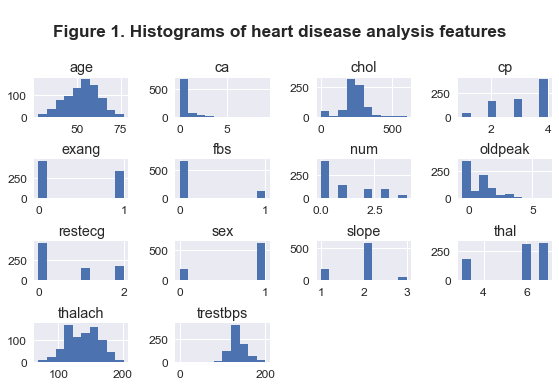

In [4]:
sns.set(font_scale=1.20)
all_three_df.hist()
plt.suptitle('\nFigure 1. Histograms of heart disease analysis features', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.80)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
cleveland_dfnoL = cleveland_df.drop('location', axis=1)
X = cleveland_dfnoL.drop('num', axis = 1)
# Split the data into a training and test set.
#Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender == "Male").values,random_state=5)

#clf = LogisticRegression()
# Fit the model on the trainng data.
#clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
#print(accuracy_score(clf.predict(Xtestlr), ytestlr))

CX_train, CX_test, cy_train, cy_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
rfcc = RandomForestClassifier()
rfcc.fit(CX_train, cy_train)
print('Basic Random Forest accuracy on training data:',round(rfcc.score(CX_train, cy_train),3))
print('Basic Random Forest accuracy on test data:',round(rfcc.score(CX_test, cy_test),3))

rfcc_pred = rfcc.predict(CX_test)
print(classification_report(cy_test,rfcc_pred))

Basic Random Forest accuracy on training data: 0.987
Basic Random Forest accuracy on test data: 0.526
             precision    recall  f1-score   support

          0       0.71      0.91      0.80        33
          1       0.18      0.23      0.20        13
          2       0.45      0.29      0.36        17
          3       0.33      0.20      0.25        10
          4       0.00      0.00      0.00         3

avg / total       0.49      0.53      0.49        76



/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators' : [1,3,9,18,36,96,200,600], 'max_depth': [1,3,9], 'min_samples_leaf': [1,3,10]}
CV_rfcc = GridSearchCV(estimator=rfcc, param_grid=param_grid, cv=5)
CV_rfcc.fit(CX_train, cy_train)
print(CV_rfcc.best_params_)
print(CV_rfcc.best_score_)
print(CV_rfcc.best_estimator_)

{'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 9}
0.625550660793
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [7]:
from sklearn.metrics import classification_report, confusion_matrix
#using parameters found by Grid Search plus feature selection by square root
#rfcc_tuned = RandomForestClassifier(CV_rfcc.best_estimator_)
rfcc_tuned = CV_rfcc.best_estimator_
rfcc_tuned.fit(CX_train, cy_train)
cy_true, cy_predict = cy_test, rfcc_tuned.predict(CX_test)
print('Tuned random forest accuracy on training data:',round(rfcc_tuned.score(CX_train, cy_train),3))
print('Tuned random forest accuracy on test data:',round(rfcc_tuned.score(CX_test, cy_test),3))
print('\nClassification report:\n',classification_report(cy_true,cy_predict))
print('Confusion matrix:\n',confusion_matrix(cy_true,cy_predict))
'''
feature_namesfor = cleveland_dfnoL.columns
importancesfor = rfcc_tuned.feature_importances_
stdfor = np.std([tree.feature_importances_ for tree in rfcc_tuned.estimators_],axis=0)
indicesfor = np.argsort(importancesfor)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indicesfor[f], importancesfor[indicesfor[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importancesfor[indicesfor], color="g", yerr=stdfor[indicesfor], align="center")
feature_namesfor = cleveland_dfnoL.columns
plt.xticks(range(X.shape[1]), feature_namesfor)
plt.xlim([-1, X.shape[1]])
plt.show()
'''

Tuned random forest accuracy on training data: 0.648
Tuned random forest accuracy on test data: 0.513

Classification report:
              precision    recall  f1-score   support

          0       0.55      1.00      0.71        33
          1       0.29      0.15      0.20        13
          2       0.00      0.00      0.00        17
          3       0.44      0.40      0.42        10
          4       0.00      0.00      0.00         3

avg / total       0.35      0.51      0.40        76

Confusion matrix:
 [[33  0  0  0  0]
 [ 8  2  0  3  0]
 [11  4  0  2  0]
 [ 5  1  0  4  0]
 [ 3  0  0  0  0]]


/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'\nfeature_namesfor = cleveland_dfnoL.columns\nimportancesfor = rfcc_tuned.feature_importances_\nstdfor = np.std([tree.feature_importances_ for tree in rfcc_tuned.estimators_],axis=0)\nindicesfor = np.argsort(importancesfor)[::-1]\nprint("Feature ranking:")\nfor f in range(X.shape[1]):\n    print("%d. feature %d (%f)" % (f + 1, indicesfor[f], importancesfor[indicesfor[f]]))\nplt.figure()\nplt.title("Feature importances")\nplt.bar(range(X.shape[1]), importancesfor[indicesfor], color="g", yerr=stdfor[indicesfor], align="center")\nfeature_namesfor = cleveland_dfnoL.columns\nplt.xticks(range(X.shape[1]), feature_namesfor)\nplt.xlim([-1, X.shape[1]])\nplt.show()\n'

In [8]:
from sklearn.naive_bayes import MultinomialNB
CX1_train, CX1_test, cy1_train, cy1_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
mnbc = MultinomialNB()
mnbc.fit(CX1_train, cy1_train)
print('Accuracy on training data:',round(mnbc.score(CX1_train, cy1_train),3))
print('Accuracy on test data:',round(mnbc.score(CX1_test, cy1_test),3))

mnbc_pred = mnbc.predict(CX1_test)
print(classification_report(cy1_test,mnbc_pred))

Accuracy on training data: 0.586
Accuracy on test data: 0.526
             precision    recall  f1-score   support

          0       0.71      0.91      0.80        33
          1       0.25      0.15      0.19        13
          2       0.33      0.29      0.31        17
          3       0.27      0.30      0.29        10
          4       0.00      0.00      0.00         3

avg / total       0.46      0.53      0.49        76



/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
from sklearn.naive_bayes import GaussianNB
CX2_train, CX2_test, cy2_train, cy2_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
gnbc = GaussianNB()
gnbc.fit(CX2_train, cy2_train)
print('Accuracy on training data:',round(gnbc.score(CX2_train, cy2_train),3))
print('Accuracy on test data:',round(gnbc.score(CX2_test, cy2_test),3))

gnbc_pred = gnbc.predict(CX2_test)
print(classification_report(cy2_test,gnbc_pred))

Accuracy on training data: 0.678
Accuracy on test data: 0.513
             precision    recall  f1-score   support

          0       0.88      0.88      0.88        33
          1       0.25      0.38      0.30        13
          2       0.33      0.24      0.28        17
          3       0.14      0.10      0.12        10
          4       0.00      0.00      0.00         3

avg / total       0.52      0.51      0.51        76



In [10]:
from sklearn.linear_model import LogisticRegression
CX3_train, CX3_test, cy3_train, cy3_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
logregc = LogisticRegression()
logregc.fit(CX3_train, cy3_train)
print('Accuracy on training data:',round(logregc.score(CX3_train, cy3_train),3))
print('Accuracy on test data:',round(logregc.score(CX3_test, cy3_test),3))

logregc_pred = logregc.predict(CX3_test)
print(classification_report(cy3_test,logregc_pred))

Accuracy on training data: 0.67
Accuracy on test data: 0.539
             precision    recall  f1-score   support

          0       0.73      0.97      0.83        33
          1       0.29      0.31      0.30        13
          2       0.29      0.12      0.17        17
          3       0.27      0.30      0.29        10
          4       0.00      0.00      0.00         3

avg / total       0.46      0.54      0.49        76



/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
CX4_train, CX4_test, cy4_train, cy4_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
rfccno = RandomForestClassifier()
rfccno.fit(CX4_train, cy4_train)
print('Basic Random Forest accuracy on training data:',round(rfccno.score(CX4_train, cy4_train),3))
print('Basic Random Forest accuracy on test data:',round(rfccno.score(CX4_test, cy4_test),3))

rfccno_pred = rfccno.predict(CX4_test)
print(classification_report(cy4_test,rfccno_pred))

Basic Random Forest accuracy on training data: 0.996
Basic Random Forest accuracy on test data: 0.789
             precision    recall  f1-score   support

      False       0.83      0.79      0.81        43
       True       0.74      0.79      0.76        33

avg / total       0.79      0.79      0.79        76



In [12]:
param_grid = {'n_estimators' : [1,3,9,18,36,96,200,600], 'max_depth': [1,3,9], 'min_samples_leaf': [1,3,10]}
CV_rfccno = GridSearchCV(estimator=rfccno, param_grid=param_grid, cv=5)
CV_rfccno.fit(CX4_train, cy4_train)
print(CV_rfccno.best_params_)
print(CV_rfccno.best_score_)
print(CV_rfccno.best_estimator_)

{'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 36}
0.837004405286
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=36, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [13]:
rfccno_tuned = CV_rfccno.best_estimator_
rfccno_tuned.fit(CX4_train, cy4_train)
cy4_true, cy4_predict = cy4_test, rfccno_tuned.predict(CX4_test)
print('Tuned random forest accuracy on training data:',round(rfccno_tuned.score(CX4_train, cy4_train),3))
print('Tuned random forest accuracy on test data:',round(rfccno_tuned.score(CX4_test, cy4_test),3))
print('\nClassification report:\n',classification_report(cy4_true,cy4_predict))
print('Confusion matrix:\n',confusion_matrix(cy4_true,cy4_predict))
'''
feature_namesforno = cleveland_dfnoL.columns
importancesforno = rfccno_tuned.feature_importances_
stdforno = np.std([tree.feature_importances_ for tree in rfccno_tuned.estimators_],axis=0)
indicesforno = np.argsort(importancesforno)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indicesforno[f], importancesforno[indicesforno[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importancesforno[indicesforno], color="g", yerr=stdforno[indicesforno], align="center")
feature_namesforno = cleveland_dfnoL.columns
plt.xticks(range(X.shape[1]), feature_namesforno)
plt.xlim([-1, X.shape[1]])
plt.show()
'''

Tuned random forest accuracy on training data: 0.859
Tuned random forest accuracy on test data: 0.868

Classification report:
              precision    recall  f1-score   support

      False       0.95      0.81      0.88        43
       True       0.79      0.94      0.86        33

avg / total       0.88      0.87      0.87        76

Confusion matrix:
 [[35  8]
 [ 2 31]]


'\nfeature_namesforno = cleveland_dfnoL.columns\nimportancesforno = rfccno_tuned.feature_importances_\nstdforno = np.std([tree.feature_importances_ for tree in rfccno_tuned.estimators_],axis=0)\nindicesforno = np.argsort(importancesforno)[::-1]\nprint("Feature ranking:")\nfor f in range(X.shape[1]):\n    print("%d. feature %d (%f)" % (f + 1, indicesforno[f], importancesforno[indicesforno[f]]))\nplt.figure()\nplt.title("Feature importances")\nplt.bar(range(X.shape[1]), importancesforno[indicesforno], color="g", yerr=stdforno[indicesforno], align="center")\nfeature_namesforno = cleveland_dfnoL.columns\nplt.xticks(range(X.shape[1]), feature_namesforno)\nplt.xlim([-1, X.shape[1]])\nplt.show()\n'

In [14]:
CX5_train, CX5_test, cy5_train, cy5_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
mnbcno = MultinomialNB()
mnbcno.fit(CX5_train, cy5_train)
print('Accuracy on training data:',round(mnbcno.score(CX5_train, cy5_train),3))
print('Accuracy on test data:',round(mnbcno.score(CX5_test, cy5_test),3))

mnbcno_pred = mnbcno.predict(CX5_test)
print(classification_report(cy5_test,mnbcno_pred))

Accuracy on training data: 0.758
Accuracy on test data: 0.803
             precision    recall  f1-score   support

      False       0.91      0.72      0.81        43
       True       0.71      0.91      0.80        33

avg / total       0.83      0.80      0.80        76



In [15]:
CX6_train, CX6_test, cy6_train, cy6_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
gnbcno = GaussianNB()
gnbcno.fit(CX6_train, cy6_train)
print('Accuracy on training data:',round(gnbcno.score(CX6_train, cy6_train),3))
print('Accuracy on test data:',round(gnbcno.score(CX6_test, cy6_test),3))

gnbcno_pred = gnbcno.predict(CX6_test)
print(classification_report(cy6_test,gnbcno_pred))

Accuracy on training data: 0.846
Accuracy on test data: 0.868
             precision    recall  f1-score   support

      False       0.95      0.81      0.88        43
       True       0.79      0.94      0.86        33

avg / total       0.88      0.87      0.87        76



In [16]:
CX7_train, CX7_test, cy7_train, cy7_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
logregcno = LogisticRegression()
logregcno.fit(CX7_train, cy7_train)
print('Accuracy on training data:',round(logregcno.score(CX7_train, cy7_train),3))
print('Accuracy on test data:',round(logregcno.score(CX7_test, cy7_test),3))

logregcno_pred = logregcno.predict(CX7_test)
print(classification_report(cy7_test,logregcno_pred))

Accuracy on training data: 0.846
Accuracy on test data: 0.868
             precision    recall  f1-score   support

      False       0.90      0.86      0.88        43
       True       0.83      0.88      0.85        33

avg / total       0.87      0.87      0.87        76



In [17]:
from sklearn import svm
CX8_train, CX8_test, cy8_train, cy8_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
sv = svm.SVC()
sv.fit(CX8_train, cy8_train)
print('Accuracy on training data:',round(sv.score(CX8_train, cy8_train),3))
print('Accuracy on test data:',round(sv.score(CX8_test, cy8_test),3))

sv_pred = sv.predict(CX8_test)
print(classification_report(cy8_test,sv_pred))

Accuracy on training data: 1.0
Accuracy on test data: 0.434
             precision    recall  f1-score   support

          0       0.43      1.00      0.61        33
          1       0.00      0.00      0.00        13
          2       0.00      0.00      0.00        17
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00         3

avg / total       0.19      0.43      0.26        76



/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
CX9_train, CX9_test, cy9_train, cy9_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
svlin = svm.LinearSVC()
svlin.fit(CX9_train, cy9_train)
print('Accuracy on training data:',round(svlin.score(CX9_train, cy9_train),3))
print('Accuracy on test data:',round(svlin.score(CX9_test, cy9_test),3))

svlin_pred = svlin.predict(CX9_test)
print(classification_report(cy9_test,svlin_pred))

Accuracy on training data: 0.678
Accuracy on test data: 0.539
             precision    recall  f1-score   support

          0       0.79      0.91      0.85        33
          1       0.26      0.38      0.31        13
          2       0.36      0.24      0.29        17
          3       0.25      0.20      0.22        10
          4       0.00      0.00      0.00         3

avg / total       0.50      0.54      0.51        76



/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
CX10_train, CX10_test, cy10_train, cy10_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
svno = svm.SVC()
svno.fit(CX10_train, cy10_train)
print('Accuracy on training data:',round(svno.score(CX10_train, cy10_train),3))
print('Accuracy on test data:',round(svno.score(CX10_test, cy10_test),3))

svno_pred = svno.predict(CX10_test)
print(classification_report(cy10_test,svno_pred))

Accuracy on training data: 1.0
Accuracy on test data: 0.434
             precision    recall  f1-score   support

      False       0.00      0.00      0.00        43
       True       0.43      1.00      0.61        33

avg / total       0.19      0.43      0.26        76



/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
CX11_train, CX11_test, cy11_train, cy11_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
svlinno = svm.LinearSVC()
svlinno.fit(CX11_train, cy11_train)
print('Accuracy on training data:',round(svlinno.score(CX11_train, cy11_train),3))
print('Accuracy on test data:',round(svlinno.score(CX11_test, cy11_test),3))

svlinno_pred = svlinno.predict(CX11_test)
print(classification_report(cy11_test,svlinno_pred))

Accuracy on training data: 0.423
Accuracy on test data: 0.566
             precision    recall  f1-score   support

      False       0.57      1.00      0.72        43
       True       0.00      0.00      0.00        33

avg / total       0.32      0.57      0.41        76



/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
from sklearn import tree
CX12_train, CX12_test, cy12_train, cy12_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
dt = tree.DecisionTreeClassifier()
dt.fit(CX12_train, cy12_train)
print('Accuracy on training data:',round(dt.score(CX12_train, cy12_train),3))
print('Accuracy on test data:',round(dt.score(CX12_test, cy12_test),3))

dt_pred = dt.predict(CX12_test)
print(classification_report(cy12_test,dt_pred))

Accuracy on training data: 1.0
Accuracy on test data: 0.5
             precision    recall  f1-score   support

          0       0.75      0.82      0.78        33
          1       0.11      0.15      0.13        13
          2       0.40      0.24      0.30        17
          3       0.50      0.50      0.50        10
          4       0.00      0.00      0.00         3

avg / total       0.50      0.50      0.49        76



In [22]:
CX13_train, CX13_test, cy13_train, cy13_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
dtno = tree.DecisionTreeClassifier()
dtno.fit(CX13_train, cy13_train)
print('Accuracy on training data:',round(dtno.score(CX13_train, cy13_train),3))
print('Accuracy on test data:',round(dtno.score(CX13_test, cy13_test),3))

dtno_pred = dtno.predict(CX13_test)
print(classification_report(cy13_test,dtno_pred))

Accuracy on training data: 1.0
Accuracy on test data: 0.789
             precision    recall  f1-score   support

      False       0.91      0.70      0.79        43
       True       0.70      0.91      0.79        33

avg / total       0.82      0.79      0.79        76



In [23]:
from sklearn.ensemble import GradientBoostingClassifier
CX14_train, CX14_test, cy14_train, cy14_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=1)
gbc.fit(CX14_train, cy14_train)
print('Accuracy on training data:',round(gbc.score(CX14_train, cy14_train),3))
print('Accuracy on test data:',round(gbc.score(CX14_test, cy14_test),3))

gbc_pred = gbc.predict(CX14_test)
print(classification_report(cy14_test,gbc_pred))

Accuracy on training data: 0.982
Accuracy on test data: 0.5
             precision    recall  f1-score   support

          0       0.70      0.91      0.79        33
          1       0.29      0.31      0.30        13
          2       0.30      0.18      0.22        17
          3       0.12      0.10      0.11        10
          4       0.00      0.00      0.00         3

avg / total       0.44      0.50      0.46        76



In [24]:
CX15_train, CX15_test, cy15_train, cy15_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
gbcno = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=1)
gbcno.fit(CX15_train, cy15_train)
print('Accuracy on training data:',round(gbcno.score(CX15_train, cy15_train),3))
print('Accuracy on test data:',round(gbcno.score(CX15_test, cy15_test),3))

gbcno_pred = gbcno.predict(CX15_test)
print(classification_report(cy15_test,gbcno_pred))

Accuracy on training data: 0.881
Accuracy on test data: 0.842
             precision    recall  f1-score   support

      False       0.90      0.81      0.85        43
       True       0.78      0.88      0.83        33

avg / total       0.85      0.84      0.84        76



In [25]:
from sklearn.linear_model import SGDClassifier
CX16_train, CX16_test, cy16_train, cy16_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
sgd = SGDClassifier(loss="hinge", penalty="l2")
sgd.fit(CX16_train, cy16_train)
print('Accuracy on training data:',round(sgd.score(CX16_train, cy16_train),3))
print('Accuracy on test data:',round(sgd.score(CX16_test, cy16_test),3))

sgd_pred = sgd.predict(CX16_test)
print(classification_report(cy16_test,sgd_pred))

Accuracy on training data: 0.581
Accuracy on test data: 0.461
             precision    recall  f1-score   support

          0       0.49      1.00      0.65        33
          1       0.00      0.00      0.00        13
          2       0.00      0.00      0.00        17
          3       0.29      0.20      0.24        10
          4       0.00      0.00      0.00         3

avg / total       0.25      0.46      0.31        76



/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
CX17_train, CX17_test, cy17_train, cy17_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
sgdno = SGDClassifier(loss="hinge", penalty="l2")
sgdno.fit(CX17_train, cy17_train)
print('Accuracy on training data:',round(sgdno.score(CX17_train, cy17_train),3))
print('Accuracy on test data:',round(sgdno.score(CX17_test, cy17_test),3))

sgdno_pred = sgdno.predict(CX17_test)
print(classification_report(cy17_test,sgdno_pred))

Accuracy on training data: 0.445
Accuracy on test data: 0.579
             precision    recall  f1-score   support

      False       0.57      1.00      0.73        43
       True       1.00      0.03      0.06        33

avg / total       0.76      0.58      0.44        76



In [27]:
from sklearn.ensemble import ExtraTreesClassifier
CX25_train, CX25_test, cy25_train, cy25_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(CX25_train, cy25_train)

print('Accuracy on training data:',round(forest.score(CX25_train, cy25_train),3))
print('Accuracy on test data:',round(forest.score(CX25_test, cy25_test),3))

'''
feature_names = cleveland_dfnoL.columns
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
feature_names = cleveland_dfnoL.columns
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.show()
'''

forest_pred = forest.predict(CX25_test)
print(classification_report(cy25_test,forest_pred))

Accuracy on training data: 1.0
Accuracy on test data: 0.513
             precision    recall  f1-score   support

          0       0.62      0.91      0.74        33
          1       0.31      0.31      0.31        13
          2       0.40      0.12      0.18        17
          3       0.22      0.20      0.21        10
          4       1.00      0.33      0.50         3

avg / total       0.48      0.51      0.46        76



In [28]:
CX20_train, CX20_test, cy20_train, cy20_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
foresta = ExtraTreesClassifier(n_estimators=250, random_state=0)
foresta.fit(CX20_train, cy20_train)

print('Accuracy on training data:',round(foresta.score(CX20_train, cy20_train),3))
print('Accuracy on test data:',round(foresta.score(CX20_test, cy20_test),3))

'''
feature_names = cleveland_dfnoL.columns
importances = foresta.feature_importances_
std = np.std([tree.feature_importances_ for tree in foresta.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
feature_names = cleveland_dfnoL.columns
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.show()
'''
foresta_pred = foresta.predict(CX20_test)
print(classification_report(cy20_test,foresta_pred))

Accuracy on training data: 1.0
Accuracy on test data: 0.829
             precision    recall  f1-score   support

      False       0.88      0.81      0.84        43
       True       0.78      0.85      0.81        33

avg / total       0.83      0.83      0.83        76



## Figure 16. Feature importance using XGBoost on Cleveland subset with a multiclass target

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy on training data: 0.995
Accuracy on test data: 0.51


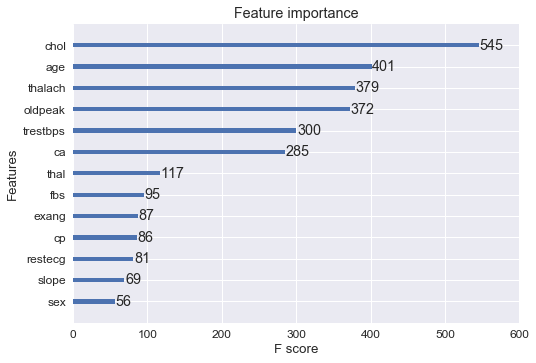

             precision    recall  f1-score   support

          0       0.75      0.91      0.83        47
          1       0.18      0.25      0.21        16
          2       0.27      0.17      0.21        18
          3       0.11      0.07      0.09        14
          4       0.00      0.00      0.00         5

avg / total       0.45      0.51      0.47       100



In [29]:
from xgboost import XGBClassifier, plot_importance
test_size = 0.33
CX18_train, CX18_test, cy18_train, cy18_test = train_test_split(X, cleveland_dfnoL.num, test_size=test_size, random_state=29)
xgb = XGBClassifier()
xgb.fit(CX18_train, cy18_train)
print(xgb)
cy18_pred = xgb.predict(CX18_test)
predictions1 = [round(value) for value in cy18_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Accuracy on training data:',round(xgb.score(CX18_train, cy18_train),3))
print('Accuracy on test data:',round(xgb.score(CX18_test, cy18_test),3))

plot_importance(xgb)
plt.show()
print(classification_report(cy18_test,predictions1))

## Figure 17. Feature importance using XGBoost on Cleveland subset with a binary target

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy on training data: 0.975
Accuracy on test data: 0.86


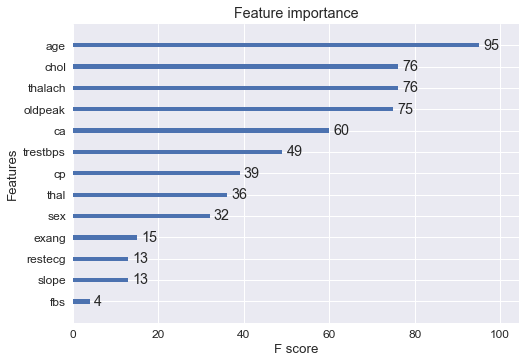

             precision    recall  f1-score   support

      False       0.90      0.83      0.86        53
       True       0.82      0.89      0.86        47

avg / total       0.86      0.86      0.86       100



In [30]:
test_size = 0.33
CX19_train, CX19_test, cy19_train, cy19_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, test_size=test_size, random_state=29)
xgbno = XGBClassifier()
xgbno.fit(CX19_train, cy19_train)
print(xgbno)
cy19_pred = xgbno.predict(CX19_test)
predictions2 = [round(value) for value in cy19_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Accuracy on training data:',round(xgbno.score(CX19_train, cy19_train),3))
print('Accuracy on test data:',round(xgbno.score(CX19_test, cy19_test),3))

plot_importance(xgbno)

plt.show()

print(classification_report(cy19_test,predictions2))

In [31]:
#import csv
import lime
import lime.lime_tabular
from lime import lime_text
from __future__ import print_function
from sklearn.pipeline import make_pipeline

Xnp = np.asarray(X)
ynp = np.asarray(cleveland_dfnoL.num)
#Xnp = X.as_matrix()
#ynp = cleveland_dfnoL.num.as_matrix()
print(Xnp.shape)
print(ynp.shape)
#Xnp.reshape((303,13))
#ynp.reshape((303,))
#print(Xnp)
#print(ynp)
'''
Xnp_train, Xnp_test, ynp_train, ynp_test = train_test_split(Xnp, ynp, random_state=29)
rfclime = RandomForestClassifier(max_depth=9, min_samples_leaf=3, n_estimators=9)
rfclime.fit(Xnp_train, ynp_train)

predict_fn_rfclime = lambda x: rfclime.predict_proba(Xnp).astype(float)

cat_columns = []
train_cat_features_ver2 = ()
train_int_features = ()
#train_float_features = ('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')
train_float_features = ('age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal')
feature_names_cat = list(train_cat_features_ver2)
feature_names_float = list(train_float_features)
feature_names_int = list(train_int_features)
feature_names = sum([feature_names_float, feature_names_cat, feature_names_int],[])
print(feature_names)
class_names = [0,1,2,3,4]
print(class_names)

categorical_features = np.argwhere(np.array([len(set(Xnp[:,x]))
    for x in range(Xnp.shape[1])]) <= 10).flatten()

explainer = lime.lime_tabular.LimeTabularExplainer(Xnp_train, feature_names=feature_names, class_names=class_names, categorical_features=categorical_features, discretize_continuous=True)
i = 30
exp = explainer.explain_instance(Xnp_test[i], predict_fn_rfclime, num_features=13)

exp.show_in_notebook(show_all=False)
print(ynp_test[i])
'''

(303, 13)
(303,)


"\nXnp_train, Xnp_test, ynp_train, ynp_test = train_test_split(Xnp, ynp, random_state=29)\nrfclime = RandomForestClassifier(max_depth=9, min_samples_leaf=3, n_estimators=9)\nrfclime.fit(Xnp_train, ynp_train)\n\npredict_fn_rfclime = lambda x: rfclime.predict_proba(Xnp).astype(float)\n\ncat_columns = []\ntrain_cat_features_ver2 = ()\ntrain_int_features = ()\n#train_float_features = ('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')\ntrain_float_features = ('age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal')\nfeature_names_cat = list(train_cat_features_ver2)\nfeature_names_float = list(train_float_features)\nfeature_names_int = list(train_int_features)\nfeature_names = sum([feature_names_float, feature_names_cat, feature_names_int],[])\nprint(feature_names)\nclass_names = [0,1,2,3,4]\nprint(class_names)\n\ncategorical_features = np.argwhere(np.array([len(set(Xnp[:,x]))\n    for x

In [32]:
from sklearn.neural_network import MLPClassifier  
CX22_train, CX22_test, cy22_train, cy22_test = train_test_split(X, cleveland_dfnoL.num, random_state=29)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(CX22_train, cy22_train) 
predmlp = mlp.predict(CX22_test)
print('Accuracy on training data:',round(mlp.score(CX22_train, cy22_train),3))
print('Accuracy on test data:',round(mlp.score(CX22_test, cy22_test),3))
print(confusion_matrix(cy22_test,predmlp))  
print(classification_report(cy22_test,predmlp))  

Accuracy on training data: 0.577
Accuracy on test data: 0.434
[[33  0  0  0  0]
 [13  0  0  0  0]
 [17  0  0  0  0]
 [10  0  0  0  0]
 [ 3  0  0  0  0]]
             precision    recall  f1-score   support

          0       0.43      1.00      0.61        33
          1       0.00      0.00      0.00        13
          2       0.00      0.00      0.00        17
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00         3

avg / total       0.19      0.43      0.26        76



/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
CX23_train, CX23_test, cy23_train, cy23_test = train_test_split(X, (cleveland_dfnoL.num == 0).values, random_state=29)
mlpno = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlpno.fit(CX23_train, cy23_train) 
predmlpno = mlpno.predict(CX23_test)
print('Accuracy on training data:',round(mlpno.score(CX23_train, cy23_train),3))
print('Accuracy on test data:',round(mlpno.score(CX23_test, cy23_test),3))
print(confusion_matrix(cy23_test,predmlpno))  
print(classification_report(cy23_test,predmlpno))  

Accuracy on training data: 0.423
Accuracy on test data: 0.566
[[43  0]
 [33  0]]
             precision    recall  f1-score   support

      False       0.57      1.00      0.72        43
       True       0.00      0.00      0.00        33

avg / total       0.32      0.57      0.41        76



/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
print('Basic Random Forest accuracy on training data:',round(rfcc.score(CX_train, cy_train),3))
print('Basic Random Forest accuracy on test data:',round(rfcc.score(CX_test, cy_test),3))
rfcc_pred = rfcc.predict(CX_test)
print(classification_report(cy_test,rfcc_pred))

print('Tuned random forest accuracy on training data:',round(rfcc_tuned.score(CX_train, cy_train),3))
print('Tuned random forest accuracy on test data:',round(rfcc_tuned.score(CX_test, cy_test),3))
print('\nClassification report:\n',classification_report(cy_true,cy_predict))
print('Confusion matrix:\n',confusion_matrix(cy_true,cy_predict))

print('MultinomialNB accuracy on training data:',round(mnbc.score(CX1_train, cy1_train),3))
print('MultinomialNB accuracy on test data:',round(mnbc.score(CX1_test, cy1_test),3))
mnbc_pred = mnbc.predict(CX1_test)
print(classification_report(cy1_test,mnbc_pred))

print('GaussianNB accuracy on training data:',round(gnbc.score(CX2_train, cy2_train),3))
print('GaussianNB accuracy on test data:',round(gnbc.score(CX2_test, cy2_test),3))
gnbc_pred = gnbc.predict(CX2_test)
print(classification_report(cy2_test,gnbc_pred))

print('Logistic regression accuracy on training data:',round(logregc.score(CX3_train, cy3_train),3))
print('Logistic regression accuracy on test data:',round(logregc.score(CX3_test, cy3_test),3))
logregc_pred = logregc.predict(CX3_test)
print(classification_report(cy3_test,logregc_pred))

print('Basic Random Forest (binary) accuracy on training data:',round(rfccno.score(CX4_train, cy4_train),3))
print('Basic Random Forest (binary) accuracy on test data:',round(rfccno.score(CX4_test, cy4_test),3))
rfccno_pred = rfccno.predict(CX4_test)
print(classification_report(cy4_test,rfccno_pred))

print('Tuned random forest (binary) accuracy on training data:',round(rfccno_tuned.score(CX4_train, cy4_train),3))
print('Tuned random forest (binary) accuracy on test data:',round(rfccno_tuned.score(CX4_test, cy4_test),3))
print('\nClassification report:\n',classification_report(cy4_true,cy4_predict))
print('Confusion matrix:\n',confusion_matrix(cy4_true,cy4_predict))

print('MultinomialNB (binary) accuracy on training data:',round(mnbcno.score(CX5_train, cy5_train),3))
print('MultinomialNB (binary) accuracy on test data:',round(mnbcno.score(CX5_test, cy5_test),3))
mnbcno_pred = mnbcno.predict(CX5_test)
print(classification_report(cy5_test,mnbcno_pred))

print('GaussianNB (binary) accuracy on training data:',round(gnbcno.score(CX6_train, cy6_train),3))
print('GaussianNB (binary) accuracy on test data:',round(gnbcno.score(CX6_test, cy6_test),3))
gnbcno_pred = gnbcno.predict(CX6_test)
print(classification_report(cy6_test,gnbcno_pred))

print('Logistic regression (binary) accuracy on training data:',round(logregcno.score(CX7_train, cy7_train),3))
print('Logistic regression (binary) accuracy on test data:',round(logregcno.score(CX7_test, cy7_test),3))
logregcno_pred = logregcno.predict(CX7_test)
print(classification_report(cy7_test,logregcno_pred))

print('SVM accuracy on training data:',round(sv.score(CX8_train, cy8_train),3))
print('SVM accuracy on test data:',round(sv.score(CX8_test, cy8_test),3))
sv_pred = sv.predict(CX8_test)
print(classification_report(cy8_test,sv_pred))

print('Linear SVM accuracy on training data:',round(svlin.score(CX9_train, cy9_train),3))
print('Linear SVM accuracy on test data:',round(svlin.score(CX9_test, cy9_test),3))
svlin_pred = svlin.predict(CX9_test)
print(classification_report(cy9_test,svlin_pred))

print('SVM (binary) accuracy on training data:',round(svno.score(CX10_train, cy10_train),3))
print('SVM (binary) accuracy on test data:',round(svno.score(CX10_test, cy10_test),3))
svno_pred = svno.predict(CX10_test)
print(classification_report(cy10_test,svno_pred))

print('Linear SVM (binary) accuracy on training data:',round(svlinno.score(CX11_train, cy11_train),3))
print('Linear SVM (binary) accuracy on test data:',round(svlinno.score(CX11_test, cy11_test),3))
svlinno_pred = svlinno.predict(CX11_test)
print(classification_report(cy11_test,svlinno_pred))

print('Decision tree accuracy on training data:',round(dt.score(CX12_train, cy12_train),3))
print('Decision tree accuracy on test data:',round(dt.score(CX12_test, cy12_test),3))
dt_pred = dt.predict(CX12_test)
print(classification_report(cy12_test,dt_pred))

print('Decision tree (binary) accuracy on training data:',round(dtno.score(CX13_train, cy13_train),3))
print('Decision tree (binary) accuracy on test data:',round(dtno.score(CX13_test, cy13_test),3))
dtno_pred = dtno.predict(CX13_test)
print(classification_report(cy13_test,dtno_pred))

print('Gradient boosting accuracy on training data:',round(gbc.score(CX14_train, cy14_train),3))
print('Gradient boosting accuracy on test data:',round(gbc.score(CX14_test, cy14_test),3))
gbc_pred = gbc.predict(CX14_test)
print(classification_report(cy14_test,gbc_pred))

print('Gradient boosting (binary) accuracy on training data:',round(gbcno.score(CX15_train, cy15_train),3))
print('Gradient boosting (binary) accuracy on test data:',round(gbcno.score(CX15_test, cy15_test),3))
gbcno_pred = gbcno.predict(CX15_test)
print(classification_report(cy15_test,gbcno_pred))

print('SGD accuracy on training data:',round(sgd.score(CX16_train, cy16_train),3))
print('SGD accuracy on test data:',round(sgd.score(CX16_test, cy16_test),3))
sgd_pred = sgd.predict(CX16_test)
print(classification_report(cy16_test,sgd_pred))

print('SGD (binary) accuracy on training data:',round(sgdno.score(CX17_train, cy17_train),3))
print('SGD (binary) accuracy on test data:',round(sgdno.score(CX17_test, cy17_test),3))
sgdno_pred = sgdno.predict(CX17_test)
print(classification_report(cy17_test,sgdno_pred))

print('Extra Trees accuracy on training data:',round(forest.score(CX25_train, cy25_train),3))
print('Extra Trees accuracy on test data:',round(forest.score(CX25_test, cy25_test),3))
forest_pred = forest.predict(CX25_test)
print(classification_report(cy25_test,forest_pred))

print('Extra Trees (binary) accuracy on training data:',round(foresta.score(CX20_train, cy20_train),3))
print('Extra Trees (binary) accuracy on test data:',round(foresta.score(CX20_test, cy20_test),3))
foresta_pred = foresta.predict(CX20_test)
print(classification_report(cy20_test,foresta_pred))

print('XGBoost accuracy on training data:',round(xgb.score(CX18_train, cy18_train),3))
print('XGBoost accuracy on test data:',round(xgb.score(CX18_test, cy18_test),3))
cy18_pred = xgb.predict(CX18_test)
predictions1 = [round(value) for value in cy18_pred]
print(classification_report(cy18_test,predictions1))

print('XGBoost (binary) accuracy on training data:',round(xgbno.score(CX19_train, cy19_train),3))
print('XGBoost (binary) accuracy on test data:',round(xgbno.score(CX19_test, cy19_test),3))
cy19_pred = xgbno.predict(CX19_test)
predictions2 = [round(value) for value in cy19_pred]
print(classification_report(cy19_test,predictions2))

print('Neural network accuracy on training data:',round(mlp.score(CX22_train, cy22_train),3))
print('Neural network accuracy on test data:',round(mlp.score(CX22_test, cy22_test),3))
predmlp = mlp.predict(CX22_test)
print(classification_report(cy22_test,predmlp))

print('Neural network (binary) accuracy on training data:',round(mlpno.score(CX23_train, cy23_train),3))
print('Neural network (binary) accuracy on test data:',round(mlpno.score(CX23_test, cy23_test),3))
predmlpno = mlpno.predict(CX23_test)
print(classification_report(cy23_test,predmlpno))  


Basic Random Forest accuracy on training data: 0.987
Basic Random Forest accuracy on test data: 0.526
             precision    recall  f1-score   support

          0       0.71      0.91      0.80        33
          1       0.18      0.23      0.20        13
          2       0.45      0.29      0.36        17
          3       0.33      0.20      0.25        10
          4       0.00      0.00      0.00         3

avg / total       0.49      0.53      0.49        76

Tuned random forest accuracy on training data: 0.648
Tuned random forest accuracy on test data: 0.513

Classification report:
              precision    recall  f1-score   support

          0       0.55      1.00      0.71        33
          1       0.29      0.15      0.20        13
          2       0.00      0.00      0.00        17
          3       0.44      0.40      0.42        10
          4       0.00      0.00      0.00         3

avg / total       0.35      0.51      0.40        76

Confusion matrix:
 [[33

/Users/vickimoore/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Extra Trees accuracy on test data: 0.513
             precision    recall  f1-score   support

          0       0.62      0.91      0.74        33
          1       0.31      0.31      0.31        13
          2       0.40      0.12      0.18        17
          3       0.22      0.20      0.21        10
          4       1.00      0.33      0.50         3

avg / total       0.48      0.51      0.46        76

Extra Trees (binary) accuracy on training data: 1.0
Extra Trees (binary) accuracy on test data: 0.829
             precision    recall  f1-score   support

      False       0.88      0.81      0.84        43
       True       0.78      0.85      0.81        33

avg / total       0.83      0.83      0.83        76

XGBoost accuracy on training data: 0.995
XGBoost accuracy on test data: 0.51
             precision    recall  f1-score   support

          0       0.75      0.91      0.83        47
          1       0.18      0.25      0.21        16
          2       0.27      0.1

## Table 6. Preliminary analysis of model performance on Cleveland data

In [35]:
accuracies = [['RF','full',round(rfcc.score(CX_train, cy_train),3),round(rfcc.score(CX_test, cy_test),3)], 
              ['Tuned RF','full',round(rfcc_tuned.score(CX_train, cy_train),3),round(rfcc.score(CX_test, cy_test),3)], 
              ['MNB','full',round(mnbc.score(CX1_train, cy1_train),3),round(mnbc.score(CX1_test, cy1_test),3)], 
              ['GNB','full',round(gnbc.score(CX2_train, cy2_train),3),round(gnbc.score(CX2_test, cy2_test),3)],
             ['LogReg','full',round(logregc.score(CX3_train, cy3_train),3),round(logregc.score(CX3_test, cy3_test),3)],
             ['RF', 'binary',round(rfccno.score(CX4_train, cy4_train),3),round(rfccno.score(CX4_test, cy4_test),3)],
             ['Tuned RF','binary',round(rfccno_tuned.score(CX4_train, cy4_train),3),round(rfccno_tuned.score(CX4_test, cy4_test),3)],
             ['MNB', 'binary',round(mnbcno.score(CX5_train, cy5_train),3),round(mnbcno.score(CX5_test, cy5_test),3)],
             ['GNB','binary',round(gnbcno.score(CX6_train, cy6_train),3),round(gnbcno.score(CX6_test, cy6_test),3)],
             ['LogReg', 'binary',round(logregcno.score(CX7_train, cy7_train),3),round(logregcno.score(CX7_test, cy7_test),3)],
             ['SVM', 'full',round(sv.score(CX8_train, cy8_train),3),round(sv.score(CX8_test, cy8_test),3)],
             ['LSVM', 'full',round(svlin.score(CX9_train, cy9_train),3),round(svlin.score(CX9_test, cy9_test),3)],
             ['SVM','binary',round(svno.score(CX10_train, cy10_train),3),round(svno.score(CX10_test, cy10_test),3)],
             ['LSVM', 'binary',round(svlinno.score(CX11_train, cy11_train),3),round(svlinno.score(CX11_test, cy11_test),3)],
             ['DT', 'full',round(dt.score(CX12_train, cy12_train),3),round(dt.score(CX12_test, cy12_test),3)],
             ['DT', 'binary',round(dtno.score(CX13_train, cy13_train),3),round(dtno.score(CX13_test, cy13_test),3)],
             ['GB', 'full',round(gbc.score(CX14_train, cy14_train),3),round(gbc.score(CX14_test, cy14_test),3)],
             ['GB', 'binary',round(gbcno.score(CX15_train, cy15_train),3),round(gbcno.score(CX15_test, cy15_test),3)],
             ['SGD', 'full',round(sgd.score(CX16_train, cy16_train),3),round(sgd.score(CX16_test, cy16_test),3)],
             ['SGD', 'binary',round(sgdno.score(CX17_train, cy17_train),3),round(sgdno.score(CX17_test, cy17_test),3)],
             ['ET', 'full',round(forest.score(CX25_train, cy25_train),3),round(forest.score(CX25_test, cy25_test),3)],
             ['ET', 'binary',round(foresta.score(CX20_train, cy20_train),3),round(foresta.score(CX20_test, cy20_test),3)],
             ['XGB', 'full',round(xgb.score(CX18_train, cy18_train),3),round(xgb.score(CX18_test, cy18_test),3)],
             ['XGB', 'binary',round(xgbno.score(CX19_train, cy19_train),3),round(xgbno.score(CX19_test, cy19_test),3)],
             ['NN', 'full',round(mlp.score(CX22_train, cy22_train),3),round(mlp.score(CX22_test, cy22_test),3)],
             ['NN', 'binary',round(mlpno.score(CX23_train, cy23_train),3),round(mlpno.score(CX23_test, cy23_test),3)]]
accuraciesdf = pd.DataFrame(accuracies)
accuraciesdf.columns=['Classifier', 'Classification', 'Train accuracy', 'Test accuracy']
print('\033[1m \n Table 5. Machine learning test results')
display(HTML(accuraciesdf.to_html(index=False)))

 
 Table 5. Machine learning test results


Classifier,Classification,Train accuracy,Test accuracy
RF,full,0.987,0.526
Tuned RF,full,0.648,0.526
MNB,full,0.586,0.526
GNB,full,0.678,0.513
LogReg,full,0.670,0.539
RF,binary,0.996,0.789
Tuned RF,binary,0.859,0.868
MNB,binary,0.758,0.803
GNB,binary,0.846,0.868
LogReg,binary,0.846,0.868


## Figure 11. Model performance on the Cleveland subset

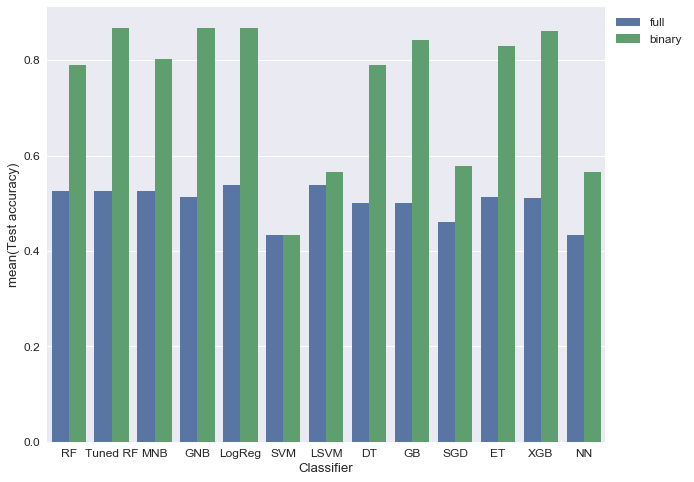

In [36]:
#sns.set(font_scale=1.20)
sns.set_context(rc={"figure.figsize": (10, 8)})
sns.barplot(x="Classifier", y="Test accuracy", hue="Classification", data=accuraciesdf)
plt.legend(bbox_to_anchor=(1.0, 1))
plt.show()

In [37]:
from xgboost import XGBClassifier, DMatrix
import shap

Xnp = np.asarray(X)
ynp = np.asarray((cleveland_dfnoL.num == 0).values)
print(Xnp.shape)
xgbpred = XGBClassifier()
xgbpred.fit(Xnp, ynp)
booster = xgbpred.get_booster()
# Using only a single sample for predict, you can use multiple
test_X = [Xnp[30]]

# Wrapping the test X into a DMatrix, need by Booster
predictions = booster.predict(DMatrix(test_X), pred_contribs=True)

print(predictions.shape)
print(predictions)
print(predictions.sum())

ModuleNotFoundError: No module named 'shap'

In [ ]:
#For heart disease presence as the positive signal
#With training xgboost before pred_contribs - so far output very similar

from xgboost import XGBClassifier, DMatrix
test_size = 0.2
Xnp = np.asarray(X)
ynp = np.asarray((cleveland_dfnoL.num >= 1).values)
#ynp = np.asarray(all_three_df_location.num)
y = (cleveland_dfnoL.num >= 1).values

print(Xnp.shape)
#xgbpred = XGBClassifier()
X51_train, X51_test, y51_train, y51_test = train_test_split(Xnp, ynp, test_size=test_size, random_state=29)
xgbpredtrain = XGBClassifier()
xgbpredtrain.fit(X51_train, y51_train)
boostertrain = xgbpredtrain.get_booster()
# Using only a single sample for predict, you can use multiple
test_X51 = [Xnp[0]]

# Wrapping the test X into a DMatrix, need by Booster
predictionstrain = boostertrain.predict(DMatrix(test_X51), pred_contribs=True)

print(predictionstrain.shape)
print(predictionstrain)
print(predictionstrain.sum())
print(X.columns)

In [ ]:
import shap
import xgboost

#binary test with y being true for presence of heart disease
y = (cleveland_dfnoL.num >= 1).values
xgb_full = xgboost.DMatrix(X, label=y)


# create a train/test split
X50_train, X50_test, y50_train, y50_test = train_test_split(X, y, test_size=0.2, random_state=7)
xgb50_train = xgboost.DMatrix(X50_train, label=y50_train)
xgb50_test = xgboost.DMatrix(X50_test, label=y50_test)
# use validation set to choose # of trees
#params = {"eta": 0.002,"max_depth": 3,"objective": "survival:cox","subsample": 0.5}
#model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)
#model_train = xgboost.train(xgb50_train, 500, evals = [(xgb50_test, "test")])
#model = xgboost.train(params, xgb_full, 100, evals = [(xgb_full, "test")])



# load JS visualization code to notebook
shap.initjs() 

# train XGBoost model; integer in xgboost.train is number of iterations; 500 and 800 gave same answer. 400, 100 didn't.
#X,y = shap.datasets.boston()
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X50_train, label=y50_train), 500)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
shap_values = shap.TreeExplainer(model).shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(shap_values[0,:], X.iloc[0,:])

In [ ]:
shap.force_plot(shap_values, X)

## Figure 21. Summary plot of SHAP values with XGBoost and the Cleveland subset (binary target)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In [ ]:
Xlimit = X.drop('age', axis = 1)
Xlimitnp = np.asarray(Xlimit)
ynp = np.asarray(cleveland_dfnoL.num)
#Xnp = X.as_matrix()
#ynp = cleveland_dfnoL.num.as_matrix()
print(Xlimitnp.shape)
print(ynp.shape)
#Xnp.reshape((303,13))
#ynp.reshape((303,))
#print(Xnp)
#print(ynp)

'''
Xlimitnp_train, Xlimitnp_test, ynp_train, ynp_test = train_test_split(Xlimitnp, ynp, random_state=29)
rfclimelimit = RandomForestClassifier(max_depth=9, min_samples_leaf=3, n_estimators=9)
rfclimelimit.fit(Xlimitnp_train, ynp_train)

predict_fn_rfclimelimit = lambda xlimit: rfclimelimit.predict_proba(Xlimitnp).astype(float)

cat_columns = []
train_cat_features_ver2 = ()
train_int_features = ()
#train_float_features = ('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')
train_float_features = ('thal','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca')
feature_names_cat = list(train_cat_features_ver2)
feature_names_float = list(train_float_features)
feature_names_int = list(train_int_features)
feature_names = sum([feature_names_float, feature_names_cat, feature_names_int],[])
print(feature_names)
class_names = [0,1,2,3,4]
print(class_names)

categorical_featureslimit = np.argwhere(np.array([len(set(Xlimitnp[:,xlimit]))
    for xlimit in range(Xlimitnp.shape[1])]) <= 10).flatten()

explainerlimit = lime.lime_tabular.LimeTabularExplainer(Xlimitnp_train, feature_names=feature_names, class_names=class_names, categorical_features=categorical_features, discretize_continuous=True)
i = 30
explimit = explainerlimit.explain_instance(Xlimitnp_test[i], predict_fn_rfclimelimit, num_features=12)

explimit.show_in_notebook(show_all=False)
print(ynp_test[i])
'''


In [ ]:
print(ynp)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = rfccno_tuned.predict_proba(CX4_test)[:,1]
print('ROC score for tuned Random Forest model:', round(roc_auc_score(cy4_test, y_pred_prob),4))
fpr, tpr, thresholds = roc_curve(cy4_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [ ]:
y_pred_probx = xgbno.predict_proba(CX19_test)[:,1]
print('ROC score for XGBoost model:', round(roc_auc_score(cy19_test, y_pred_probx),4))
fpr, tpr, thresholds = roc_curve(cy19_test, y_pred_probx)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred = rfccno_tuned.predict_proba(CX4_test)[:,1]
p, r, _ = precision_recall_curve(cy4_test, y_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(p,r, label='Random forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest PR Curve')
plt.show()

In [ ]:
y_predx = xgbno.predict_proba(CX19_test)[:,1]
px, rx, _ = precision_recall_curve(cy19_test, y_predx)

plt.plot([0,1],[0,1],'k--')
plt.plot(px,rx, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost PR Curve')
plt.show()

## Table 8. Ranking of tuned models on Cleveland subset (binary classification)

In [ ]:
from sklearn.model_selection import GridSearchCV


#y = all_three_df_location.num
y = (cleveland_dfnoL.num == 0).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

class EstimatorSelectionHelper:
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X_train, y_train, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(X_train,y_train)
            self.grid_searches[key] = gs    
    
    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})
                      
        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params),1))
            all_scores = np.hstack(scores)
            for p,s in zip(params,all_scores):
                rows.append((row(k,s,p)))
        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        
        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        
        return df[columns]

In [ ]:
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression

models1 = { 
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}

params1 = { 
    'ExtraTreesClassifier': { 'n_estimators': [16, 32, 100] },
    'RandomForestClassifier': { 'n_estimators': [16, 32, 100] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32, 100] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32, 100], 'learning_rate': [0.8, 1.0] },
    'XGBClassifier': [{ 'n_estimators': [16, 32, 100]}, {'max_depth': [4, 20]}, {'min_child_weight': [1, 10]}, {'gamma': [0.01, 0.1]}],
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10, 100]},
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring='f1', n_jobs=-1)

helper1.score_summary(sort_by='mean_score')

In [ ]:
'''
linear_lr = LogisticRegression()
linear_lr.fit(CX3_train, cy3_train)


# explain all the predictions in the test set
shap_values = shap.KernelExplainer(linear_lr.predict_proba, CX3_train).shap_values(CX3_test)
shap.force_plot(shap_values[0], CX3_test)
'''
